In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [51]:
class MagicCard():
    def __init__(self, startingPrice, meanPctChange, stdPctChange):
        self.currentPrice = startingPrice
        self.meanChange = meanPctChange
        self.stdChange = stdPctChange
    
    def getPrice(self):
        return self.currentPrice
    
    def updatePrice(self):
        self.currentPrice *= (1.0+self.meanChange + self.stdChange * np.random.randn())
    
    def updateAndGet(self):
        self.updatePrice()
        return self.getPrice()
    
    def updateNTimesteps(self, n, returnHistory=None):
        history = [self.getPrice()]
        for i in range(n):
            updatedPrice = self.updateAndGet()
            if returnHistory:
                history.append(updatedPrice)
        if returnHistory:
            return history
        else:
            return None

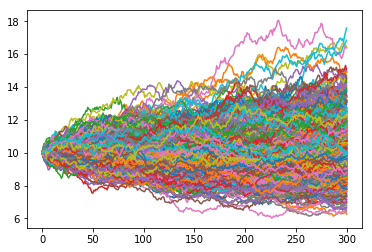

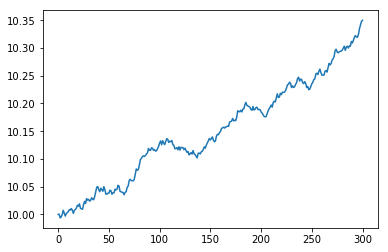

In [101]:
arrs = []
for i in range(500):
    fB = MagicCard(10, 0.01/100, .01)
    arr = fB.updateNTimesteps(300, True)
    arrs.append(arr)
for arr in arrs:
    plt.plot(arr)
plt.show()
plt.figure()
plt.plot(np.mean(np.array(arrs), axis=0))
plt.show()

In [39]:
5000/365

13.698630136986301